In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

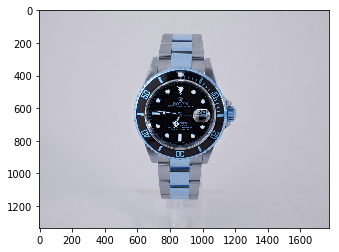

In [2]:
img=cv2.imread('watch.jpg')
img.shape
plt.ion()
plt.imshow(img)


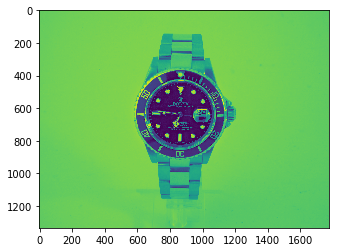

In [4]:
img_grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale)

In [4]:
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

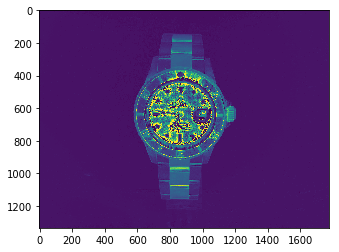

In [5]:
img_back=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)
plt.imshow(img_hsv[:,:,1])

In [6]:
B,G,R=cv2.split(img)

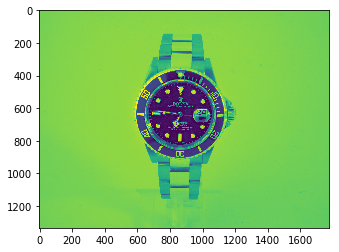

In [7]:
plt.imshow(B)
plt.imshow(G)
plt.imshow(R)

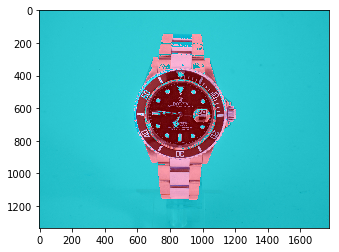

In [8]:
plt.imshow(cv2.merge([B+100,G,R]))

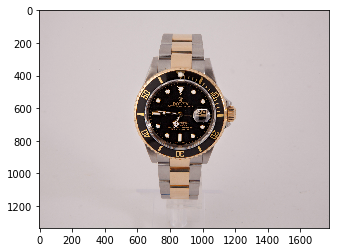

In [9]:
zeros=np.zeros(img.shape[:2],dtype='uint8')
plt.imshow(cv2.merge([R,G,B]))

array([  0, 255,   0], dtype=uint8)

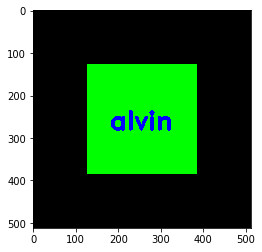

In [35]:
black=np.zeros((512,512,3),np.uint8)
cv2.circle(black,(256,256),128,(255,0,0),-1)
cv2.rectangle(black,(128,128),(384,384),(0,255,0),-5)
cv2.putText(black,"alvin",(180,280),cv2.FONT_HERSHEY_DUPLEX,2,(0,0,255),5)
plt.imshow(black)
plt.imshow(black)
black[256][256]


In [11]:
#affine of image'
height,width=img.shape[:2]
h1,w1=height/3,width/3
T=np.float32([[0,1,h1],[1,0,w1]])
img_affine=cv2.warpAffine(img,T,(height,width))

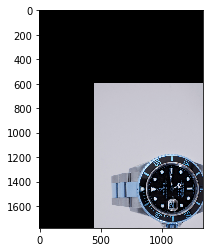

In [12]:
plt.imshow(img_affine)

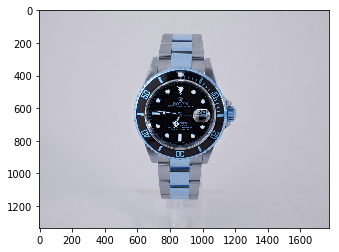

In [13]:
## -------------- transpose of image ---------------
transpose_img=cv2.transpose(img)
transpose_img=cv2.transpose(transpose_img)
plt.imshow(transpose_img)

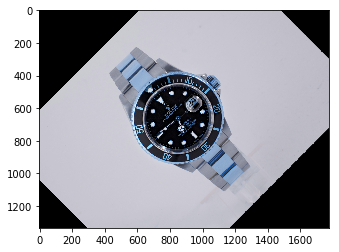

In [14]:
## particular angle rotation
angle_mat=cv2.getRotationMatrix2D((width/2,height/2),45,1)
angle_img=cv2.warpAffine(img,angle_mat,(width,height))
plt.imshow(angle_img)

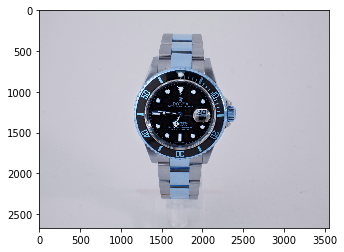

In [15]:
resized_img=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_img)

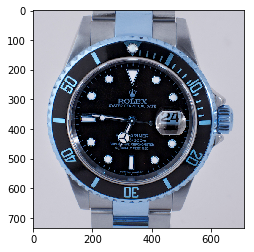

In [22]:
#cropping the image
st_row,end_row=int(height*0.20),int(height*0.75)
st_col,end_col=int(width*0.3),int(width*0.70)
cropped_img=img[st_row:end_row,st_col:end_col]
plt.imshow(cropped_img)

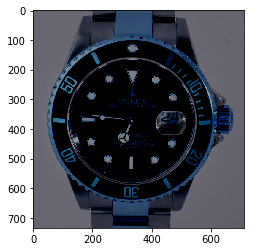

In [64]:
ones=np.ones(cropped_img.shape,dtype="uint8")*100
added=cv2.subtract(cropped_img,ones)
plt.imshow(added)

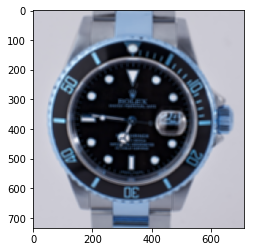

In [65]:
var=10
kernel_var=np.ones((var,var),np.float32)/var**2
blurred=cv2.filter2D(cropped_img,-1,kernel_var)
#fig,axs=plt.subplots(1,2)
plt.imshow(added)
plt.imshow(blurred)

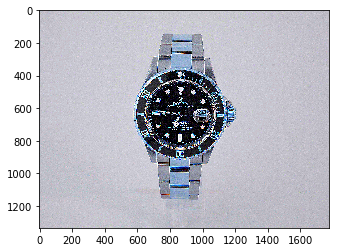

In [67]:
#sharpening the image
kernel_sharp=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharp_img=cv2.filter2D(img,-1,kernel_sharp)
plt.imshow(sharp_img)

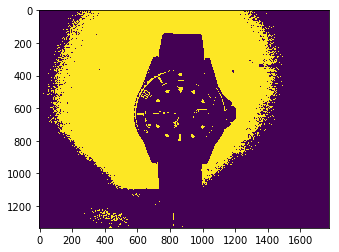

In [81]:
gray_scaled=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thres=cv2.threshold(gray_scaled,200,255,cv2.THRESH_BINARY)
thres.shape
plt.imshow(thres)

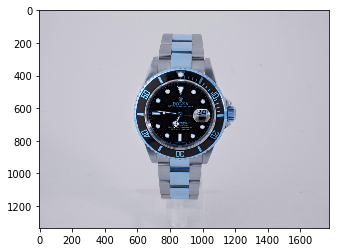

In [108]:
#thresholing
text_img=cv2.imread("watch.jpg")
blur=cv2.GaussianBlur(text_img,(3,3),0)
#ret,thres=cv2.threshold(text_img,127,255,cv2.THRESH_OTSU)
plt.imshow(blur)

In [119]:
ar=np.uint16([[3,2],[4],[7],[23]])
ar.reshape((2))
ar


ValueError: setting an array element with a sequence.

In [3]:
import cv2
import matplotlib.pyplot as plt
def sketch(image):
    img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    img_bl=cv2.GaussianBlur(img_gray,(5,5),0)
    canny=cv2.Canny(img_bl,10,80)
    ret,mask=cv2.threshold(canny,70,255,cv2.THRESH_BINARY_INV)
    return mask

In [6]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    cv2.imshow("skecth",sketch(frame))
    if cv2.waitKey(1) & 0xFF ==ord('q') :
        break
cap.release()
cv2.destroyAllWindows()

error: /home/travis/miniconda/conda-bld/conda_1486587069159/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor
